In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from IPython import display
%matplotlib inline


Using TensorFlow backend.
2022-02-09 17:06:03.913408: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-09 17:06:03.982666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 17:06:03.983064: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.755GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-02-09 17:06:03.983111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 17:06:03.983463: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 1 

In [2]:
#Global configuration
attackMode = 'Raw' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 500 #Query Budgets
NumberOfTest = 100 #Number of test images
random.seed(42) #Set random seeds

2022-01-14 10:34:24.006326: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-14 10:34:24.146005: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-14 10:34:24.826637: W tensorflow/stream_executor/gpu/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.


6: 0.9942889
2: 0.0026954121
4: 0.0018765273
3: 0.0010828591
5: 5.5464036e-05
9: 4.4001203e-07


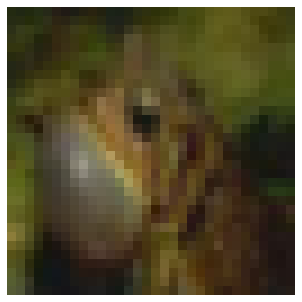

In [3]:
#Prepare test images
File,ImgPre = ResultSave('BO-OPT-l2','./CIFAR/')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)


In [4]:
from BODBA import bayesian_attack
#Run the experiments
noiseGenerator = 'perlin'#Options: perlin; gabor; BICU; BILI; CLUSTER; NN
constraint = 'l2'#norm: l2; linf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        timehistory,adversarial = bayesian_attack(image,max_query=queryBudgets,
                                                             noise=noiseGenerator,constraint=constraint)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)
        

round 0: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.144073247909546, Linf:0.05392158031463623
round 1: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:7.868006229400635, Linf:0.20784315466880798
round 2: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:7.428042411804199, Linf:0.18823543190956116
round 3: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:0.5587177276611328, Linf:0.014215707778930664
round 4: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.665602684020996, Linf:0.04313728213310242
round 5: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.5225528478622437, Linf:0.03921569883823395
round 6: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.2311060428619385, Linf:0.05686277151107788
round 7: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.2115405797958374, Linf:0.0313725471496582
round 8: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.6795876026153564, Linf:0.04362747073173523
round 9: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.0657696723937988, Linf:0.027450978755950928
round 10: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.35515081882476807, Linf:0.008823543787002563
round 11: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:1.5271649360656738, Linf:0.039215683937072754
round 12: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.83620285987854, Linf:0.04656863212585449
round 13: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.0579620599746704, Linf:0.026960790157318115
round 14: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.173922061920166, Linf:0.13333332538604736
round 15: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6832486391067505, Linf:0.017156869173049927
round 16: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.161930799484253, Linf:0.08137257397174835
round 17: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.224435567855835, Linf:0.03186279535293579
round 18: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:3.797358512878418, Linf:0.11274513602256775
round 19: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.9997639656066895, Linf:0.051470592617988586
round 20: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:2.399508476257324, Linf:0.061764732003211975
round 21: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:0.21311886608600616, Linf:0.005392193794250488
round 22: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.1205222606658936, Linf:0.08039215207099915
round 23: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.5629262328147888, Linf:0.014215707778930664
round 24: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6432011127471924, Linf:0.0156862735748291
round 25: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.7395613193511963, Linf:0.0735294371843338
round 26: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.2915828227996826, Linf:0.032352954149246216
round 27: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.5372281074523926, Linf:0.06568628549575806
round 28: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.4216020107269287, Linf:0.036764681339263916
round 29: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:1.4537471532821655, Linf:0.037745118141174316
round 30: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.3408719599246979, Linf:0.008823513984680176
round 31: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.461036443710327, Linf:0.06470590829849243
round 32: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.666430711746216, Linf:0.06764709949493408
round 33: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8016843795776367, Linf:0.02058824896812439
round 34: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.7334213256835938, Linf:0.04411765933036804
round 35: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.913681983947754, Linf:0.04950982332229614
round 36: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.110263347625732, Linf:0.1764705777168274
round 37: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:7.951491832733154, Linf:0.22156858444213867
round 38: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.2562363147735596, Linf:0.0313725620508194
round 39: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.3902260065078735, Linf:0.03627455234527588
round 40: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.8529090881347656, Linf:0.1049019992351532
round 41: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.265678644180298, Linf:0.05980399250984192
round 42: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.477371096611023, Linf:0.03872552514076233
round 43: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:0.7362518906593323, Linf:0.019607871770858765
round 44: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6010644435882568, Linf:0.015196084976196289
round 45: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:7.7923264503479, Linf:0.20784319937229156
round 46: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.4575982987880707, Linf:0.011764705181121826
round 47: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:0.6065636873245239, Linf:0.0156862735748291
round 48: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:1.352288842201233, Linf:0.03431372344493866
round 49: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:1.1829522848129272, Linf:0.030392169952392578
round 50: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.0732829570770264, Linf:0.05196082592010498
round 51: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.1433298587799072, Linf:0.05539214611053467
round 52: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:2.8685784339904785, Linf:0.07941177487373352
round 53: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.2798599004745483, Linf:0.03284314274787903
round 54: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.326580762863159, Linf:0.05931372940540314
round 55: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.481566309928894, Linf:0.03872549533843994
round 56: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.9602533578872681, Linf:0.024509817361831665
round 57: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.9871784448623657, Linf:0.05049021542072296
round 58: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.189622163772583, Linf:0.03088235855102539
round 59: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.7552802562713623, Linf:0.07745099067687988
round 60: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:5.209595680236816, Linf:0.13725493848323822
round 61: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:2.765578508377075, Linf:0.07450979948043823
round 62: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6597985029220581, Linf:0.016666680574417114
round 63: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:0.6527556777000427, Linf:0.016666680574417114
round 64: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:5.794429302215576, Linf:0.1686275154352188
round 65: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.3711090087890625, Linf:0.060294121503829956
round 66: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.3992072343826294, Linf:0.03529413044452667
round 67: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.4347407817840576, Linf:0.036274492740631104
round 68: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.0750943422317505, Linf:0.027941226959228516
round 69: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:0.8312098383903503, Linf:0.021078437566757202
round 70: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8369036912918091, Linf:0.021078437566757202
round 71: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.312443971633911, Linf:0.08529412746429443
round 72: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:4.374727725982666, Linf:0.12941180169582367
round 73: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.413716197013855, Linf:0.010294139385223389
round 74: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:6.433197498321533, Linf:0.1647060215473175
round 75: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8336193561553955, Linf:0.021568655967712402
round 76: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.46399784088134766, Linf:0.012254953384399414
round 77: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.171943187713623, Linf:0.08725491911172867
round 78: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:7.191722869873047, Linf:0.19607841968536377
round 79: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.4976952075958252, Linf:0.012745141983032227
round 80: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:9.060352325439453, Linf:0.2588237226009369
round 81: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.3847230672836304, Linf:0.035294145345687866
round 82: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:1.1284737586975098, Linf:0.028921574354171753
round 83: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:1.9946129322052002, Linf:0.05049020051956177
round 84: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:3.6983447074890137, Linf:0.09607845544815063
round 85: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:0.8908146023750305, Linf:0.022549033164978027
round 86: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.6085777282714844, Linf:0.09215685725212097
round 87: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:1.2558205127716064, Linf:0.03186279535293579
round 88: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8294353485107422, Linf:0.02107846736907959
round 89: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.002458095550537, Linf:0.025490224361419678
round 90: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:4.012214660644531, Linf:0.10098043084144592
round 91: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.8078997135162354, Linf:0.09803923964500427
round 92: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.3010505437850952, Linf:0.007843151688575745
round 93: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.5222104787826538, Linf:0.03921571373939514
round 94: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.3592586815357208, Linf:0.009313762187957764
round 95: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.5829980969429016, Linf:0.014705896377563477
round 96: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.7473039031028748, Linf:0.019607871770858765
round 97: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.9241995811462402, Linf:0.023529425263404846
round 98: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:0.05799955129623413, Linf:0.0014705955982208252
round 99: 

  0%|          | 0/500 [00:00<?, ?it/s]

inf happened
Attack result: L2:2.7455973625183105, Linf:0.07156865298748016


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/iar/anaconda3/envs/BO/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
(25, 2)
70
1.4794687032699585
0.038725510239601135


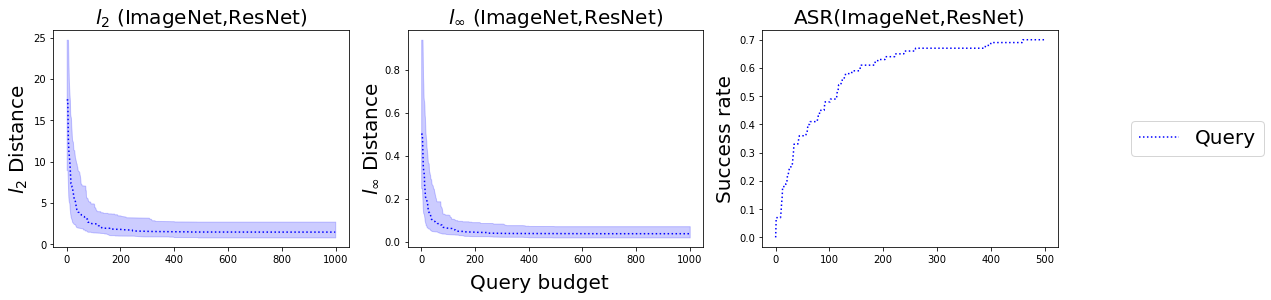

In [5]:
#Preview the results
from Visualization import Result
Valid=NumberOfTest
fontsize=20
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))

vis.Plot(0,Valid,1000,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,1000,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,500,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)

In [6]:
print(File)

./CIFAR//BO-OPT-l2.dat
